In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/churn_all.csv")

In [ ]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,State,Latitude,Longitude,ZipCode,PhoneService,...,TechSupport,StreamingTV,StreamingMovies,Tenure,Contract,PaymentMethod,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,3668-QPYBK,Male,No,No,No,California,33.964131,-118.272783,90003,Yes,...,No,No,No,2,Month-to-month,Mailed check,Yes,53.85,108.15,Yes
1,9237-HQITU,Female,No,No,Yes,California,34.059281,-118.307420,90005,Yes,...,No,No,No,2,Month-to-month,Electronic check,Yes,70.70,151.65,Yes
2,9305-CDSKC,Female,No,No,Yes,California,34.048013,-118.293953,90006,Yes,...,No,Yes,Yes,8,Month-to-month,Electronic check,Yes,99.65,820.50,Yes
3,7892-POOKP,Female,No,Yes,Yes,California,34.062125,-118.315709,90010,Yes,...,Yes,Yes,Yes,28,Month-to-month,Electronic check,Yes,104.80,3046.05,Yes
4,0280-XJGEX,Male,No,No,Yes,California,34.039224,-118.266293,90015,Yes,...,No,Yes,Yes,49,Month-to-month,Bank transfer (automatic),Yes,103.70,5036.30,Yes


In [ ]:
df.columns.values

array(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'State', 'Latitude', 'Longitude', 'ZipCode', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Tenure', 'Contract', 'PaymentMethod',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype=object)

In [ ]:
df.dtypes

CustomerID           object
Gender               object
SeniorCitizen        object
Partner              object
Dependents           object
State                object
Latitude            float64
Longitude           float64
ZipCode               int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Tenure                int64
Contract             object
PaymentMethod        object
PaperlessBilling     object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
cust_df=df.iloc[:, 1:]

In [ ]:
cust_df = cust_df.drop(['State'], axis = 1)
cust_df = cust_df.drop(['Latitude'], axis = 1)
cust_df = cust_df.drop(['Longitude'], axis = 1)
cust_df = cust_df.drop(['ZipCode'], axis = 1)

In [ ]:
cust_df.isnull().sum()

Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Tenure              0
Contract            0
PaymentMethod       0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
cust_df["Churn"][cust_df["Churn"]=="Yes"].groupby(by=df["Gender"]).count()

Gender
Female    939
Male      930
Name: Churn, dtype: int64

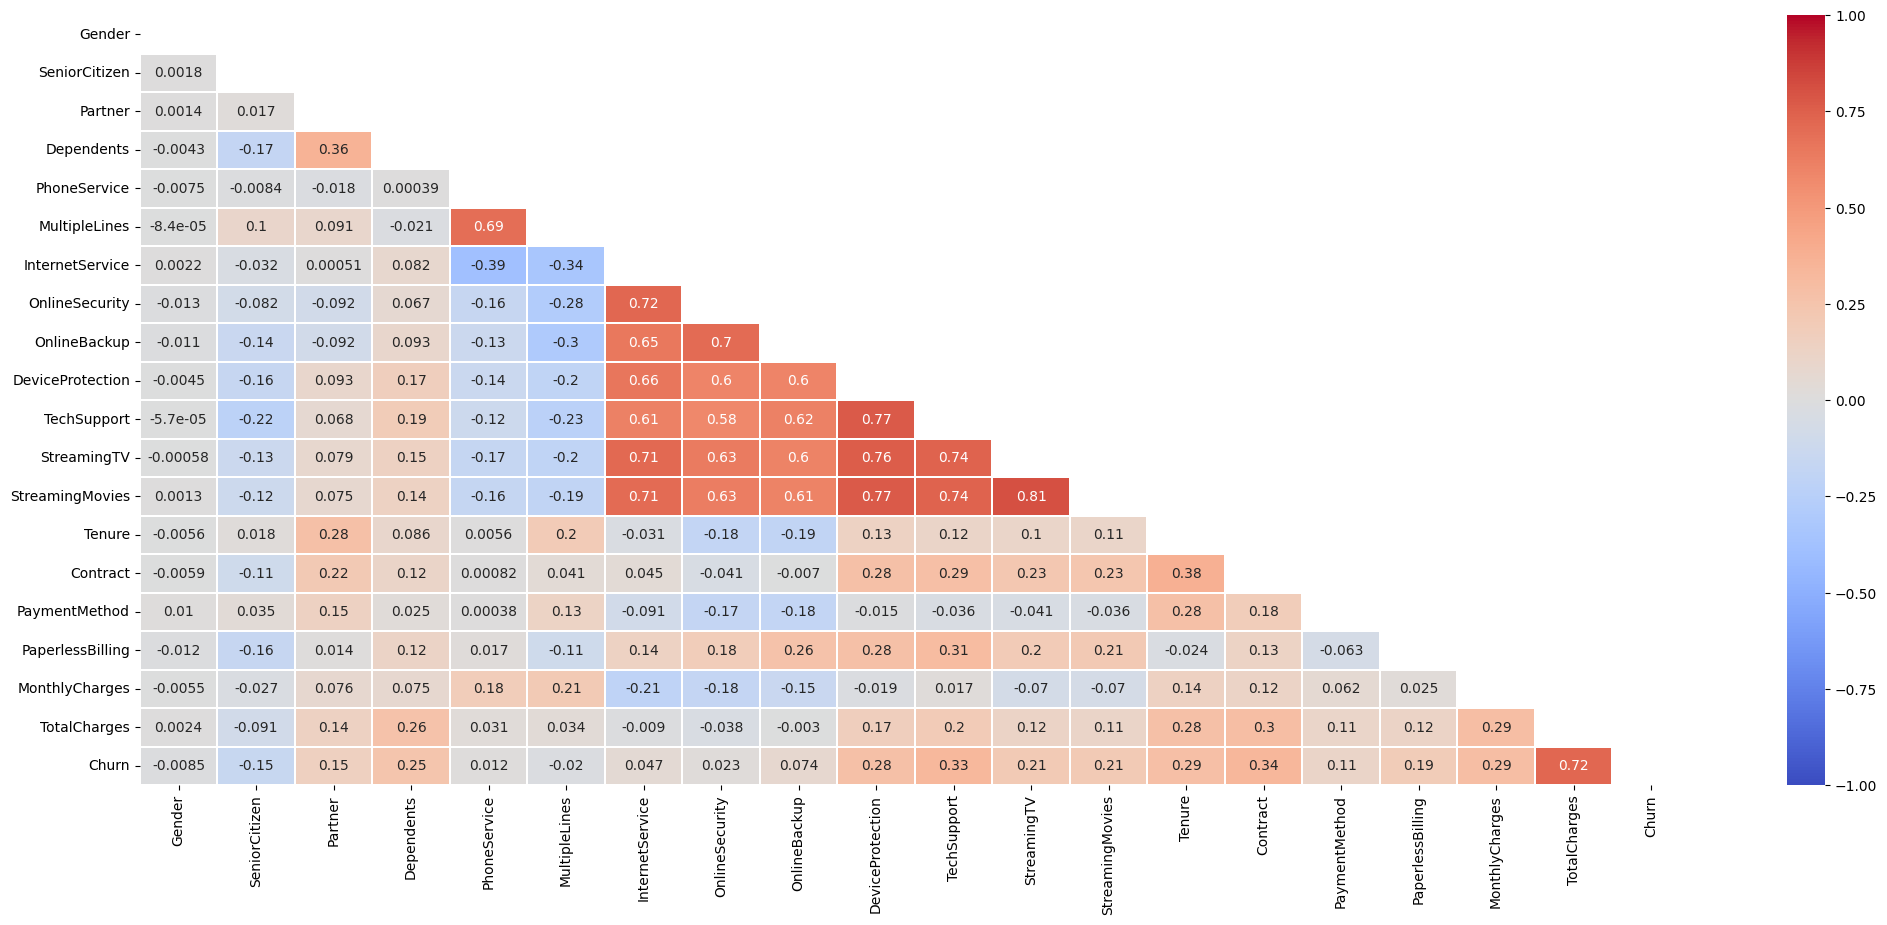

In [ ]:
plt.figure(figsize=(25, 10))

corr = cust_df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series


In [ ]:
cust_df = cust_df.apply(lambda x: object_to_int(x))
cust_df.head()

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Tenure,Contract,PaymentMethod,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1,0,0,0,1,0,0,2,2,0,0,0,0,2,0,3,1,53.85,108.15,1
1,0,0,0,1,1,0,1,0,0,0,0,0,0,2,0,2,1,70.70,151.65,1
2,0,0,0,1,1,2,1,0,0,2,0,2,2,8,0,2,1,99.65,820.50,1
3,0,0,1,1,1,2,1,0,0,2,2,2,2,28,0,2,1,104.80,3046.05,1
4,1,0,0,1,1,2,1,0,2,2,0,2,2,49,0,0,1,103.70,5036.30,1


In [ ]:
# Count the occurrences of each unique value in the "Churn" column
churn_counts = cust_df['Churn'].value_counts()

# Display the counts
print(churn_counts)

0    5163
1    1869
Name: Churn, dtype: int64


In [ ]:
plt.figure(figsize=(14,7))
cust_df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
Gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
Dependents         -0.248140
TechSupport        -0.282232
OnlineSecurity     -0.289050
Tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [ ]:
X = cust_df.drop(columns = ['Churn'])
y = cust_df['Churn'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

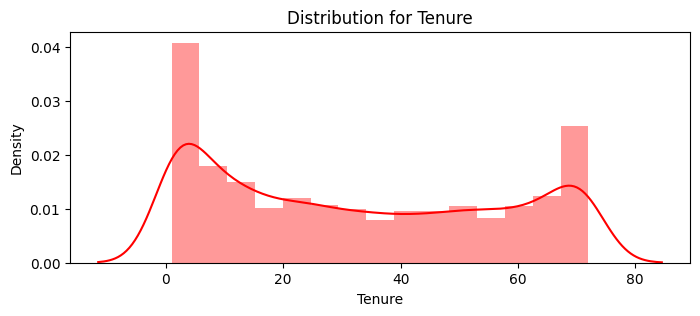

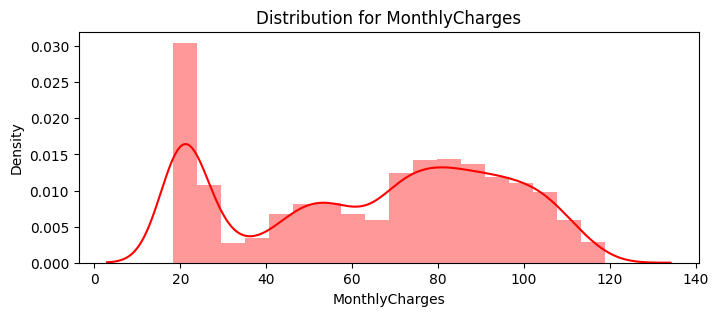

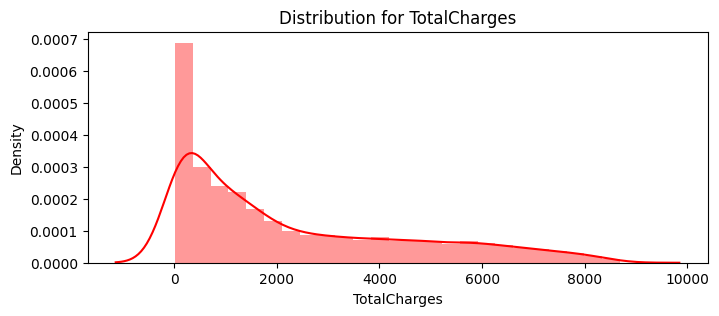

In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

num_cols = ["Tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, cust_df)

**Standardizing numeric attributes**

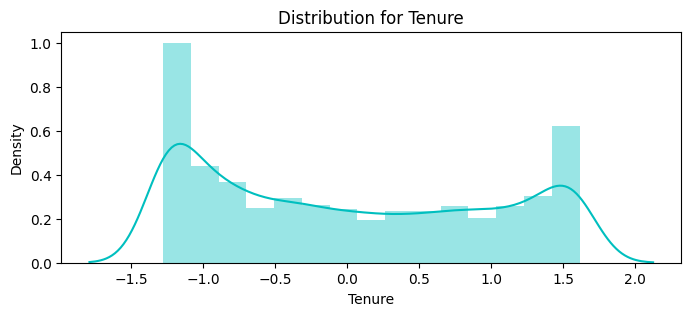

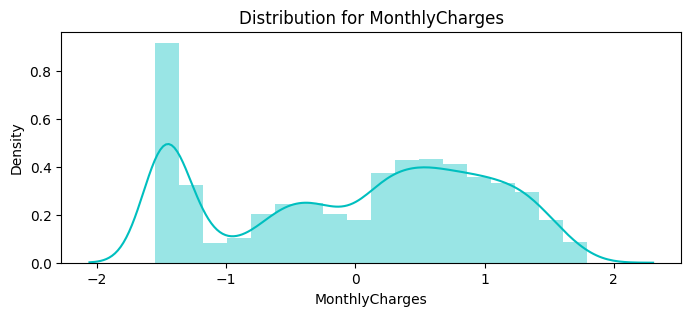

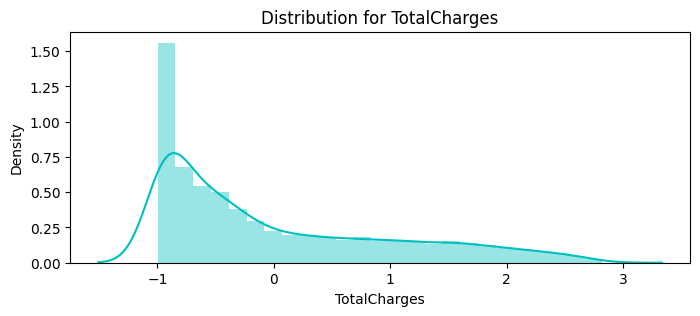

In [ ]:
from sklearn.preprocessing import StandardScaler

df_std = pd.DataFrame(StandardScaler().fit_transform(cust_df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in num_cols: distplot(feat, df_std, color='c')

In [ ]:
# Divide the columns into 3 categories, one for standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [ ]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

**MACHINE LEARNING**

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7777251184834123


In [ ]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1549
           1       0.59      0.54      0.56       561

    accuracy                           0.78      2110
   macro avg       0.71      0.70      0.71      2110
weighted avg       0.77      0.78      0.77      2110



**SVC**

In [ ]:
from sklearn.svm import SVC

svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.8080568720379147


In [ ]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.67      0.54      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.818957345971564


In [ ]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1549
           1       0.71      0.54      0.61       561

    accuracy                           0.82      2110
   macro avg       0.78      0.73      0.75      2110
weighted avg       0.81      0.82      0.81      2110



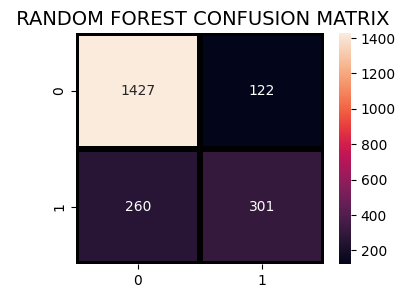

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

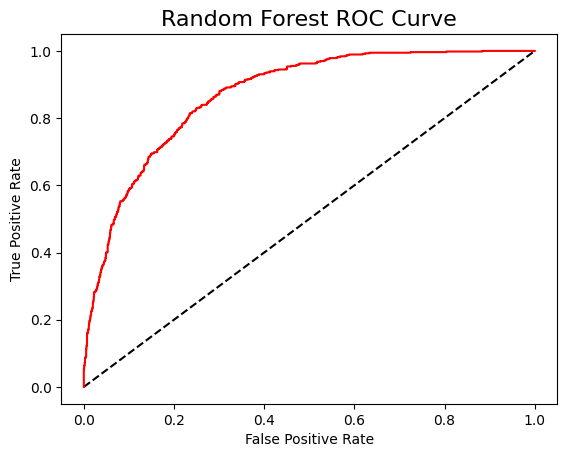

In [ ]:
from sklearn.metrics import roc_curve,auc

y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, prediction_test)

# Calculate AUC-ROC
roc_auc = auc(fpr, tpr)

print(roc_auc)

0.7288906994219719


**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8165876777251185


In [ ]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1549
           1       0.67      0.61      0.64       561

    accuracy                           0.82      2110
   macro avg       0.77      0.75      0.76      2110
weighted avg       0.81      0.82      0.81      2110



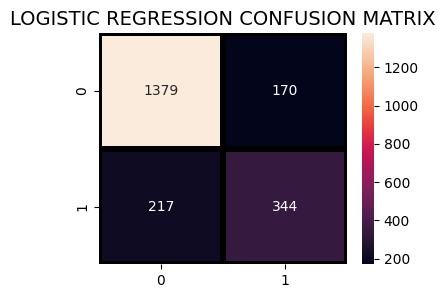

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()